In [1]:
import glob
import os
import sys
import platform
import requests
import batanalysis as ba
import matplotlib.pyplot as plt
import numpy as np
from astropy.time import Time, TimeDelta
from astropy.io import fits
from pathlib import Path
import swiftbat.swutil as sbu
import swiftbat
import pickle
plt.ion()

ba.datadir("/home/idies/workspace/Temporary/ashleyh12/scratch/grb130427A")

restart=True

In [2]:
# # check the number of CPUs (for nprocs)
# import multiprocessing
# multiprocessing.cpu_count()

In [3]:
# incat=ba.create_custom_catalog('GRB_____', 217.919, 36.300, 62.54, 66.88)
# incat=Path("./custom_catalog.cat")


In [4]:
object_name = "GRB130427A"
object_location = swiftbat.simbadlocation(object_name)
object_batsource = swiftbat.source(
    ra=object_location[0], dec=object_location[1], name=object_name
)
print(object_location)

(173.13683333333333, 27.698944444444443)


In [5]:
#automating the grb name format using astropy
## CONVERTING THE GRB NAME TO A MONTH-YEAR-DAY FORMAT
from astropy.time import Time

def grb_date(grb_name):
    year = "20" + grb_name[3:5]  # converting the grb name to years
    month = grb_name[5:7] # converting the name to months via indexing
    day = grb_name[7:9]  # converting it to days 

    date_format = f"{year}-{month}-{day}" # setting up the string format
    time = Time(date_format, format='iso') # using the Astropy Time object and passing the date string into it
    return time
    
grb_name = "GRB130427A"
grb_time = grb_date(grb_name) # storing the result of time format from above function
last_day = grb_time + 7 # adding a week to the above time 
print(f"{str(grb_time)} .. {str(last_day)}")

2013-04-27 00:00:00.000 .. 2013-05-04 00:00:00.000


In [6]:
query_args = dict(Start_Time=str(grb_date(grb_name)), fields='All', resultmax=0)
table_everything = ba.from_heasarc(**query_args)
minexposure = 1000     # cm^2 after cos adjust
source_name="GRB130427A"
object_name='GRB130427A'
object_batsource = swiftbat.source(ra=object_location[0], dec=object_location[1], name=object_name)
    
#calculate the exposure with partial coding
exposures = np.array([object_batsource.exposure(ra=row['RA'], dec=row['DEC'], roll=row['ROLL_ANGLE'])[0] for row in table_everything])
    
#select the observations that have greater than the minimum desired exposure
table_exposed = table_everything[exposures > minexposure]
print(f"Finding everything finds {len(table_everything)} observations, of which {len(table_exposed)} have more than {minexposure:0} cm^2 coded")
    
print(np.sort(table_exposed["START_TIME"]))

Finding everything finds 83 observations, of which 22 have more than 1000 cm^2 coded
   START_TIME   
      mjd       
----------------
 56408.586099537
 56409.736099537
 56409.936099537
 56409.990787037
56408.0479050926
56408.1152662037
56408.1291550926
56408.1874884259
56408.1958217593
56408.3242939815
56408.5194328704
56408.9881828704
56409.0479050926
56409.0596990741
56409.1965046296
56409.2562384259
56409.3139467593
56409.5858333333
56409.7263773148
56409.7395717593
56409.8659606481
56409.9992939815


In [7]:
#get a list of the fully downloaded observation IDs
if restart:
    result = ba.download_swiftdata(table_exposed)

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: SWIFT_TLE_ARCHIVE.txt.17313.06346494.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00049721001pat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00049721001pjb.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00049721001pob.cat.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00049721001ppr.par.gz exists and not ov

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035018083pat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035018083pjb.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035018083pob.cat.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035018083ppr.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035018083s.mkf.gz exists and not overwritten (set clo

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00032084006pat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00032084006pjb.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00032084006pob.cat.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00032084006ppr.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00032084006s.mkf.gz exists and not overwritten (set clo

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00553977011pat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00553977011pjb.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00553977011pob.cat.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00553977011ppr.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00553977011s.mkf.gz exists and not overwritten (set clo

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00553977012pat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00553977012pjb.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00553977012pob.cat.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00553977012ppr.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00553977012s.mkf.gz exists and not overwritten (set clo

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00553977012sao.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00553977012sat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00554620001pat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00554620001pjb.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00553977012sen.hk.gz exists and not overwritten (set 

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: SWIFT_TLE_ARCHIVE.txt.18018.44601275.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00554620000pat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00554620000pjb.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00554620000pob.cat.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00554620000ppr.par.gz exists and not ov

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00039620002pat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00039620002pjb.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00039620002pob.cat.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00039620002ppr.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00039620002s.mkf.gz exists and not overwritten (set clo

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035014070pat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035014070pjb.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035014070pob.cat.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035014070ppr.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035014070s.mkf.gz exists and not overwritten (set clo

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035017126pat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035017126pjb.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035017126pob.cat.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035017126ppr.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035017126s.mkf.gz exists and not overwritten (set clo

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00040550001pat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00040550001pjb.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00040550001pob.cat.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00040550001ppr.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00040550001s.mkf.gz exists and not overwritten (set clo

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00075166004pat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00075166004pjb.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00075166004pob.cat.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00075166004ppr.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00075166004s.mkf.gz exists and not overwritten (set clo

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035019097pat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035019097pjb.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035019097pob.cat.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035019097ppr.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00035019097s.mkf.gz exists and not overwritten (set clo

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00091739010pat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00091739010pjb.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00091739010pob.cat.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00091739010ppr.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00091739010s.mkf.gz exists and not overwritten (set clo

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00074868006pat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00074868006pjb.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00074868006pob.cat.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00074868006ppr.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00074868006s.mkf.gz exists and not overwritten (set clo

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00074739017pat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00074858015pat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00074858015pjb.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00074858015pob.cat.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00074858015ppr.par.gz exists and not overwritten (set 

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00049401033pat.fits.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00049401033pjb.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00049401033pob.cat.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00049401033ppr.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00049401033s.mkf.gz exists and not overwritten (set clo

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00075382007pjb.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00075382007pob.cat.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00075382007ppr.par.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00075382007s.mkf.gz exists and not overwritten (set clobber=True to override this).
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/swifttools/swift_too/swift_data.py:394: UserWarning: sw00075382007sao.fits.gz exists and not overwritten (set clo

In [8]:
if restart:
    final_obs_ids = [i for i in table_exposed['OBSID'] if result[i]['success']]
    print(len(final_obs_ids))
else:
    data_dir=ba.datadir()
    direcs=sorted(data_dir.glob("*_surveyresult")) # searching directory with survey result name in it
    final_obs_ids=[i.name.split("_surveyresult")[0] for i in direcs]
    print(len(final_obs_ids))

22


In [9]:
from astropy.coordinates import SkyCoord

object_name="GRB130427A"
if restart:
    
    object_location = swiftbat.simbadlocation(object_name)
    c=SkyCoord(ra=object_location[0], dec=object_location[1], unit="deg", frame="icrs")
    incat=ba.create_custom_catalog(object_name, c.ra.value, c.dec.value, c.galactic.l.value, c.galactic.b.value, catalog_dir=ba.datadir())
    # incat=ba.create_custom_catalog(object_name, 217.919, 36.300, 62.54, 66.88)
else:   
    dir_path = "/home/idies/workspace/Temporary/ashleyh12/scratch/grb130427A/"
    incat = Path(f"{ba.datadir(dir_path)}/custom_catalog.cat")
    print(incat)

In [10]:
#run batsurvey in parallel
input_dict=dict(cleansnr=6,cleanexpr='ALWAYS_CLEAN==T', incatalog=f"{incat}", detthresh=9000, detthresh2=9000)
noise_map_dir = Path("/home/idies/workspace/Temporary/tmpataki/scratch/PATTERN_MAPS/")
batsurvey_obs=ba.parallel.batsurvey_analysis(final_obs_ids,  input_dict=input_dict, patt_noise_dir=noise_map_dir,  nprocs=10, recalc=True)
# batsurvey_obs=ba.parallel.batsurvey_analysis(final_obs_ids,  input_dict=input_dict)


/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


Working on Obsid 00553977011
A save file has been written to /home/idies/workspace/Temporary/ashleyh12/scratch/grb130427A/00553977011_surveyresult/batsurvey.pickle.
Done with Obsid 00553977011
Working on Obsid 00075382007
A save file has been written to /home/idies/workspace/Temporary/ashleyh12/scratch/grb130427A/00075382007_surveyresult/batsurvey.pickle.
The results for each pointing of observation ID 00075382007 is:
 There were no GTI intervals found for this observation ID 00075382007
Done with Obsid 00075382007
Working on Obsid 00035018083
A save file has been written to /home/idies/workspace/Temporary/ashleyh12/scratch/grb130427A/00035018083_surveyresult/batsurvey.pickle.
Done with Obsid 00035018083
Working on Obsid 00554620002
A save file has been written to /home/idies/workspace/Temporary/ashleyh12/scratch/grb130427A/00554620002_surveyresult/batsurvey.pickle.
Done with Obsid 00554620002
Working on Obsid 00035014070
A save file has been written to /home/idies/workspace/Temporary/

In [11]:
# batsurvey_obs=ba.parallel.batsurvey_analysis(final_obs_ids,  input_dict=input_dict, patt_noise_dir=map_dir)

In [12]:
# batsurvey_obs=ba.parallel.batspectrum_analysis(batsurvey_obs, object_name, fit_iterations=1000)
if restart:
    batsurvey_obs = ba.parallel.batspectrum_analysis(
        batsurvey_obs, object_name, use_cstat=False, ul_pl_index=2, nprocs=6
    )

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/batanalysis/bat_survey.py:1293: UserWarning: Observation ID: 00554620000 Pointing ID: 20131170735 
There is no source GRB130427A found in the catalog file. Please double check the spelling.
This source may also not be detected in this observation ID/pointing ID
***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131161049.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.624e-05 +/- 3.072e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1059 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131161049.rsp for Source 1


Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared          

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131161049_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.154e-03 +/- 4.642e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1059 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131161049_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : Chi-Squared                  235.08     using 8 bins.

Test statistic : Chi-Squared                  235.08     using 8 bins.
 Null hypothesis probability of 6.29e-48 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                   42.01     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  235.08     using

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131172050.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.024e-04 +/- 3.655e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1200 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131172050.rsp for Source 1


Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared          

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131171747.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  -1.012e-03 +/- 9.326e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 336 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131171747.rsp for Source 1


Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared          

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131171916.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.305e-04 +/- 5.676e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 713 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131171916.rsp for Source 1


Fit statistic  : Chi-Squared                    2.63     using 8 bins.

Test statistic : Chi-Squared                    2.63     using 8 bins.
 Null hypothesis probability of 8.54e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powe

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131161558.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  -7.170e-04 +/- 1.126e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 257 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131161558.rsp for Source 1


Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared          

*** Parameter 1 is not a variable model parameter and no confidence range will be calculated.
 Parameter   Confidence Range (2.706)
*** Parameter 2 is not a variable model parameter and no confidence range will be calculated.
 Parameter   Confidence Range (2.706)
 Parameter   Confidence Range (2.706)
***Warning: Parameter pegged at hard limit: -100
***Warning:  *** 3 point fit failed during interpolation *** 
Upper bound error calculation is invalid.
     3            0     -85.2773    (85.2773,0)
 Parameter   Confidence Range (2.706)

***Warning: Number of trials exceeded before bracketing of delta fit-stat.
Last attempt: -3, with delta statistic: 0


*** Parameter lower bound is INVALID.


***Warning: Number of trials exceeded before bracketing of delta fit-stat.
Last attempt: 10, with delta statistic: 0


*** Parameter upper bound is INVALID.

     4            0            0    (-7.99328,-7.99328)
*** Parameter 5 is not a variable model parameter and no confidence range will be cal

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131161910.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.589e-03 +/- 1.208e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 332 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131161910.rsp for Source 1


Fit statistic  : Chi-Squared                    9.48     using 8 bins.

Test statistic : Chi-Squared                    9.48     using 8 bins.
 Null hypothesis probability of 1.48e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powe

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131172050_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.727e-03 +/- 5.292e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1200 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131172050_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : Chi-Squared                  238.89     using 8 bins.

Test statistic : Chi-Squared                  238.89     using 8 bins.
 Null hypothesis probability of 9.69e-49 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                  115.47     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  238.89     using

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131171747_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.045e-02 +/- 1.238e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 336 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131171747_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : Chi-Squared                  211.96     using 8 bins.

Test statistic : Chi-Squared                  211.96     using 8 bins.
 Null hypothesis probability of 5.37e-43 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                   15.72     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  211.96     using 

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131161558_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.507e-02 +/- 1.815e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 257 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131161558_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : Chi-Squared                  206.06     using 8 bins.

Test statistic : Chi-Squared                  206.06     using 8 bins.
 Null hypothesis probability of 9.73e-42 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                   15.00     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  206.06     using 

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131171407.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  -1.046e-04 +/- 2.867e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1200 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB130427A_survey_point_20131171407.rsp for Source 1


Fit statistic  : C-Statistic                    8.92     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  268.32     using 8 bins.
 Null hypothesis probability of 3.47e-54 with 7 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs  

*** Parameter 1 is not a variable model parameter and no confidence range will be calculated.
 Parameter   Confidence Range (2.706)
*** Parameter 2 is not a variable model parameter and no confidence range will be calculated.
 Parameter   Confidence Range (2.706)
 Parameter   Confidence Range (2.706)
***Warning: Parameter pegged at hard limit: -100
                                   Parameters
Chi-Squared  |beta|/N    Lvl    3:lg10Flux    4:PhoIndex
4.59514      0.0078873     0      -10.0011     -0.478664
 Variances and Principal Axes
                 3        4  
 2.8262E+00|  0.9972   0.0752  
 1.1974E+02| -0.0752   0.9972  
------------------------------

  Covariance Matrix
        1           2   
   3.487e+00  -8.766e+00
  -8.766e+00   1.191e+02
------------------------

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      14.0000      frozen
   2    1   cflux      Emax       ke

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131171916_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  7.802e-03 +/- 9.177e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 713 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB130427A_survey_point_20131171916_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    3.63     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   77.91     using 8 bins.
 Null hypothesis probability of 3.67e-14 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    3.63     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statisti

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131161910_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.463e-02 +/- 1.678e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 332 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB130427A_survey_point_20131161910_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    2.95     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   46.74     using 8 bins.
 Null hypothesis probability of 6.27e-08 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    2.95     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statisti

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131171407_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.914e-03 +/- 4.560e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1200 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131171407_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : Chi-Squared                  230.28     using 8 bins.

Test statistic : Chi-Squared                  230.28     using 8 bins.
 Null hypothesis probability of 6.67e-47 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                   35.94     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  230.28     using

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131172230.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  7.755e-04 +/- 3.526e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1164 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB130427A_survey_point_20131172230.rsp for Source 1


Fit statistic  : C-Statistic                    7.09     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  199.53     using 8 bins.
 Null hypothesis probability of 1.45e-39 with 7 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs   

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131170112.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.631e-03 +/- 1.424e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 896 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131170112.rsp for Source 1


Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared           

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131170247.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  -3.347e-04 +/- 1.124e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1336 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131170247.rsp for Source 1


Fit statistic  : Chi-Squared                   15.12     using 8 bins.

Test statistic : Chi-Squared                   15.12     using 8 bins.
 Null hypothesis probability of 1.93e-02 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   po

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131170424.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.096e-04 +/- 1.145e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1155 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131170424.rsp for Source 1


Fit statistic  : Chi-Squared                    3.38     using 8 bins.

Test statistic : Chi-Squared                    3.38     using 8 bins.
 Null hypothesis probability of 7.60e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   pow

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131170601.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.886e-03 +/- 1.973e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 513 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131170601.rsp for Source 1


Fit statistic  : Chi-Squared                    7.82     using 8 bins.

Test statistic : Chi-Squared                    7.82     using 8 bins.
 Null hypothesis probability of 2.51e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powe

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131172230_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.715e-03 +/- 5.330e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1164 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131172230_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : Chi-Squared                  135.25     using 8 bins.

Test statistic : Chi-Squared                  135.25     using 8 bins.
 Null hypothesis probability of 1.01e-26 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    9.77     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  135.25     using

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131170112_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.893e-02 +/- 2.176e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 896 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131170112_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : Chi-Squared                  236.53     using 8 bins.

Test statistic : Chi-Squared                  236.53     using 8 bins.
 Null hypothesis probability of 3.09e-48 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                  255.78     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  236.53     using 

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131160249.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  -1.992e-04 +/- 3.796e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 900 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB130427A_survey_point_20131160249.rsp for Source 1


Fit statistic  : C-Statistic                   27.47     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                 2268.86     using 8 bins.
 Null hypothesis probability of 0.00e+00 with 7 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs   

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131170247_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.528e-02 +/- 1.735e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1336 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB130427A_survey_point_20131170247_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                   11.93     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   54.81     using 8 bins.
 Null hypothesis probability of 1.62e-09 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                   11.93     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statist

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131160249_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.079e-03 +/- 6.011e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 900 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131160249_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : Chi-Squared                  238.89     using 8 bins.

Test statistic : Chi-Squared                  238.89     using 8 bins.
 Null hypothesis probability of 9.69e-49 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                   91.19     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  238.89     using 

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131160433.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  6.174e-04 +/- 4.386e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 587 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB130427A_survey_point_20131160433.rsp for Source 1


Fit statistic  : C-Statistic                    7.59     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  424.30     using 8 bins.
 Null hypothesis probability of 1.46e-87 with 7 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs    

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131160609.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.544e-04 +/- 4.591e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 548 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131160609.rsp for Source 1


Fit statistic  : Chi-Squared                    5.98     using 8 bins.

Test statistic : Chi-Squared                    5.98     using 8 bins.
 Null hypothesis probability of 4.26e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powe

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131161231.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  8.671e-05 +/- 5.525e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 821 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB130427A_survey_point_20131161231.rsp for Source 1


Fit statistic  : C-Statistic                    5.78     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   80.53     using 8 bins.
 Null hypothesis probability of 1.07e-14 with 7 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs    

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131170445.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.423e-04 +/- 1.247e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 228 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131170445.rsp for Source 1


Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared           

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131170424_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.570e-02 +/- 1.806e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1155 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB130427A_survey_point_20131170424_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    9.02     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   40.76     using 8 bins.
 Null hypothesis probability of 9.00e-07 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    9.02     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statist

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131170622.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  -1.155e-04 +/- 1.014e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 368 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131170622.rsp for Source 1


Fit statistic  : Chi-Squared                   13.23     using 8 bins.

Test statistic : Chi-Squared                   13.23     using 8 bins.
 Null hypothesis probability of 3.95e-02 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   pow

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131171112.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.870e-04 +/- 5.812e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 891 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131171112.rsp for Source 1


Fit statistic  : Chi-Squared                    4.02     using 8 bins.

Test statistic : Chi-Squared                    4.02     using 8 bins.
 Null hypothesis probability of 6.74e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powe

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131171248.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.202e-04 +/- 1.190e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 272 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131171248.rsp for Source 1


Fit statistic  : Chi-Squared                    4.55     using 8 bins.

Test statistic : Chi-Squared                    4.55     using 8 bins.
 Null hypothesis probability of 6.02e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powe

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131171734.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  -1.784e-04 +/- 1.048e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 372 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131171734.rsp for Source 1


Fit statistic  : Chi-Squared                    8.44     using 8 bins.

Test statistic : Chi-Squared                    8.44     using 8 bins.
 Null hypothesis probability of 2.08e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   pow

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131160750.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  -1.635e-04 +/- 5.982e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 284 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB130427A_survey_point_20131160750.rsp for Source 1


Fit statistic  : C-Statistic                    1.35     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   63.64     using 8 bins.
 Null hypothesis probability of 2.82e-11 with 7 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs   

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131160918.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.914e-04 +/- 3.854e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 763 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131160918.rsp for Source 1


Fit statistic  : Chi-Squared                   10.60     using 8 bins.

Test statistic : Chi-Squared                   10.60     using 8 bins.
 Null hypothesis probability of 1.02e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powe

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131160433_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.544e-03 +/- 6.443e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 587 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131160433_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : Chi-Squared                  224.40     using 8 bins.

Test statistic : Chi-Squared                  224.40     using 8 bins.
 Null hypothesis probability of 1.20e-45 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                   20.47     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  224.40     using 

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131161231_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  6.797e-03 +/- 7.834e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 821 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131161231_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : Chi-Squared                  216.15     using 8 bins.

Test statistic : Chi-Squared                  216.15     using 8 bins.
 Null hypothesis probability of 6.88e-44 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                   32.23     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  216.15     using 

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131170601_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.482e-02 +/- 2.927e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 513 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB130427A_survey_point_20131170601_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    8.58     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   62.80     using 8 bins.
 Null hypothesis probability of 4.16e-11 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    8.58     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statisti

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131170445_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.618e-02 +/- 1.854e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 228 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131170445_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : Chi-Squared                  237.54     using 8 bins.

Test statistic : Chi-Squared                  237.54     using 8 bins.
 Null hypothesis probability of 1.88e-48 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                   52.15     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  237.54     using 

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131161406.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.718e-04 +/- 4.127e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 797 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB130427A_survey_point_20131161406.rsp for Source 1


Fit statistic  : C-Statistic                    6.25     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  164.12     using 8 bins.
 Null hypothesis probability of 4.36e-32 with 7 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs    

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131160750_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  7.960e-03 +/- 9.338e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 284 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131160750_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : Chi-Squared                  221.17     using 8 bins.

Test statistic : Chi-Squared                  221.17     using 8 bins.
 Null hypothesis probability of 5.87e-45 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                   10.95     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  221.17     using 

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131160609_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.640e-03 +/- 6.468e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 548 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB130427A_survey_point_20131160609_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    1.90     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   48.04     using 8 bins.
 Null hypothesis probability of 3.49e-08 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    1.90     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statisti

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131170622_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.307e-02 +/- 1.541e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 368 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB130427A_survey_point_20131170622_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    2.66     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   65.10     using 8 bins.
 Null hypothesis probability of 1.44e-11 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    2.66     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statisti

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131161406_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.674e-03 +/- 6.529e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 797 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131161406_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : Chi-Squared                  219.89     using 8 bins.

Test statistic : Chi-Squared                  219.89     using 8 bins.
 Null hypothesis probability of 1.10e-44 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                   21.19     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  219.89     using 

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131160918_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.938e-03 +/- 5.783e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 763 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB130427A_survey_point_20131160918_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    3.35     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  136.04     using 8 bins.
 Null hypothesis probability of 3.43e-26 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    3.35     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statisti

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131171112_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  7.893e-03 +/- 9.275e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 891 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB130427A_survey_point_20131171112_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    5.35     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  133.50     using 8 bins.
 Null hypothesis probability of 1.16e-25 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    5.35     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statisti

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131170612.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.511e-03 +/- 1.167e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 535 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB130427A_survey_point_20131170612.rsp for Source 1


Fit statistic  : C-Statistic                    4.06     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   28.80     using 8 bins.
 Null hypothesis probability of 1.57e-04 with 7 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs    

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131171729.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  -3.533e-03 +/- 2.245e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 182 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB130427A_survey_point_20131171729.rsp for Source 1


Fit statistic  : C-Statistic                    9.04     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  223.03     using 8 bins.
 Null hypothesis probability of 1.50e-44 with 7 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs   

*** Parameter 1 is not a variable model parameter and no confidence range will be calculated.
 Parameter   Confidence Range (2.706)
*** Parameter 2 is not a variable model parameter and no confidence range will be calculated.
 Parameter   Confidence Range (2.706)
 Parameter   Confidence Range (2.706)
***Warning: Parameter pegged at hard limit: -100
***Warning:  *** 3 point fit failed during interpolation *** 
Upper bound error calculation is invalid.
     3            0      -93.221    (93.221,0)
 Parameter   Confidence Range (2.706)

***Warning: Number of trials exceeded before bracketing of delta fit-stat.
Last attempt: -3, with delta statistic: 0


*** Parameter lower bound is INVALID.


***Warning: Number of trials exceeded before bracketing of delta fit-stat.
Last attempt: 10, with delta statistic: 0


*** Parameter upper bound is INVALID.

     4            0            0    (-8.53214,-8.53214)
*** Parameter 5 is not a variable model parameter and no confidence range will be calc

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131171248_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.469e-02 +/- 1.698e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 272 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB130427A_survey_point_20131171248_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    3.11     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   80.52     using 8 bins.
 Null hypothesis probability of 1.08e-14 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    3.11     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statisti

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131170612_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.594e-02 +/- 1.800e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 535 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131170612_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : Chi-Squared                  188.06     using 8 bins.

Test statistic : Chi-Squared                  188.06     using 8 bins.
 Null hypothesis probability of 6.59e-38 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                   27.03     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  188.06     using 

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131171729_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.912e-02 +/- 3.256e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 182 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131171729_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : Chi-Squared                  238.89     using 8 bins.

Test statistic : Chi-Squared                  238.89     using 8 bins.
 Null hypothesis probability of 9.69e-49 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                  107.27     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  238.89     using 

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.
***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131171734_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.265e-02 +/- 1.469e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 372 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB130427A_survey_point_20131171734_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : C-Statistic                    2.66     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   50.85     using 8 bins.
 Null hypothesis probability of 9.83e-09 with 7 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    2.66     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statisti

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131170143.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.069e-03 +/- 1.893e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 187 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB130427A_survey_point_20131170143.rsp for Source 1


Fit statistic  : C-Statistic                    0.81     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                    3.94     using 8 bins.
 Null hypothesis probability of 7.87e-01 with 7 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs    

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131170003_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.005e-02 +/- 2.245e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 222 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131170003_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : Chi-Squared                  238.89     using 8 bins.

Test statistic : Chi-Squared                  238.89     using 8 bins.
 Null hypothesis probability of 9.69e-49 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                   88.50     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  238.89     using 

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131170143_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.242e-02 +/- 2.548e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 187 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131170143_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : Chi-Squared                  203.23     using 8 bins.

Test statistic : Chi-Squared                  203.23     using 8 bins.
 Null hypothesis probability of 3.89e-41 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                   17.85     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  203.23     using 

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131180004.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.462e-03 +/- 2.205e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 242 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB130427A_survey_point_20131180004.rsp for Source 1


Fit statistic  : C-Statistic                    1.37     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                    6.19     using 8 bins.
 Null hypothesis probability of 5.18e-01 with 7 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs    

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131180145.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  -1.068e-03 +/- 2.550e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 177 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131180145.rsp for Source 1


Fit statistic  : Chi-Squared                    9.14     using 8 bins.

Test statistic : Chi-Squared                    9.14     using 8 bins.
 Null hypothesis probability of 1.66e-01 with 6 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   pow

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131160320.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  -3.571e-03 +/- 2.046e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 186 sec
 Using fit statistic: cstat
 Using Response (RMF) File            GRB130427A_survey_point_20131160320.rsp for Source 1


Fit statistic  : C-Statistic                    5.50     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  114.94     using 8 bins.
 Null hypothesis probability of 8.65e-22 with 7 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs   

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131180004_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.779e-02 +/- 3.166e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 242 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131180004_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : Chi-Squared                  236.48     using 8 bins.

Test statistic : Chi-Squared                  236.48     using 8 bins.
 Null hypothesis probability of 3.17e-48 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                   63.26     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  236.48     using 

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_survey_point_20131160320_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.789e-02 +/- 3.262e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 186 sec
 Using fit statistic: chi
 Using Response (RMF) File            GRB130427A_survey_point_20131160320_bkgnsigma_5_upperlim.rsp for Source 1


Fit statistic  : Chi-Squared                  238.89     using 8 bins.

Test statistic : Chi-Squared                  238.89     using 8 bins.
 Null hypothesis probability of 9.69e-49 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                  104.73     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                  238.89     using 

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.


In [13]:
ba.print_parameters(batsurvey_obs, object_name, values=['met_time', 'utc_time', 'exposure', 'flux', 'index'], latex_table=False, savetable=True, save_file="output.txt")

In [14]:
all_data=ba.concatenate_data(batsurvey_obs, object_name, ["met_time", "utc_time", "exposure", "rate","rate_err","snr", "flux", "PhoIndex"])
with open(f'{object_name}_survey_data.pkl', 'wb') as f:
     pickle.dump(all_data, f)

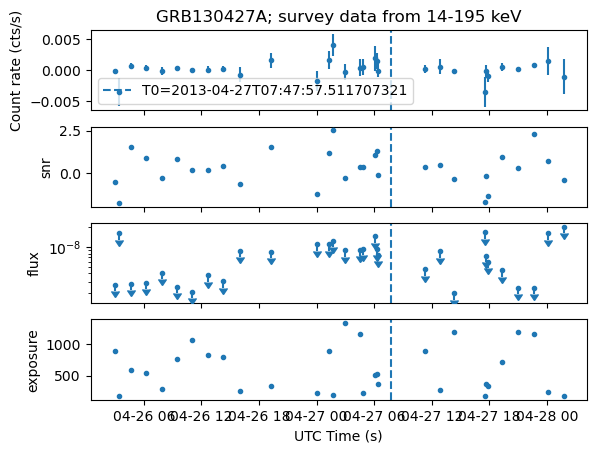

In [32]:
# fig, axes=ba.plot_survey_lc(batsurvey_obs, id_list=source_name, time_unit="UTC", values=["rate","snr", "flux", "exposure"], T0=391357300.8, calc_lc=True) #T0 is GBM trigger time

fig, axes=ba.plot_survey_lc(batsurvey_obs, id_list=object_name, time_unit="UTC", values=["rate","snr", "flux", "exposure"], T0=388741688) #T0 is GBM trigger time

axes[1].set_yscale('log')
axes[0].set_yscale('log')


axes[1].axhline(5,0,1)

fig.savefig('grb130427A_lightcurve.pdf')

In [16]:
#combine all the pointings into a single file to sort into binned fits files
if restart:
    outventory_file=ba.merge_outventory(batsurvey_obs)
else:
    outventory_file=Path(f"{(ba.datadir())}/mosaiced_surveyresults/outventory_all.fits")

In [17]:
#bin into 1 day cadence
time_bins=ba.group_outventory(outventory_file, np.timedelta64(1, "D"), end_datetime=Time("2013-04-30"))

In [18]:
#do the parallel construction of each mosaic for each time bin
mosaic_list, total_mosaic=ba.parallel.batmosaic_analysis(batsurvey_obs, outventory_file, time_bins, catalog_file=incat, nprocs=-2, recalc=restart)

Working on Obsid 00553977012
A save file has been written to /home/idies/workspace/Temporary/ashleyh12/scratch/grb130427A/00553977012_surveyresult/batsurvey.pickle.
Done with Obsid 00553977012
None
Running calculations for observation id 00032084006
Creating PHA file for  GRB130427A
Time interval: [388717927.0] [388718823.0]
Time interval: [388723667.0] [388725003.0]
Time interval: [388729488.0] [388730643.0]
Time interval: [388735290.0] [388735803.0]
The condition here is 7.309478719651725e-10 [1.0, 2.4137313823727515e-09] 3 -0.49999999879313434 1.499999997110351
No detection, just upperlimits for the spectrum: GRB130427A_survey_point_20131170112.pha
Creating PHA file for  GRB130427A
Time interval: [388717927.0] [388718823.0]
The condition here is 4.8327660503780844e-61 [1.0, 4.8327660503780844e-61] 3 -0.5 1.5
No detection, just upperlimits for the spectrum: GRB130427A_survey_point_20131170247.pha
Creating PHA file for  GRB130427A
Time interval: [388723667.0] [388725003.0]
The conditi

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 56408.117512 from DATE-OBS.
Set MJD-END to 56408.129861 from DATE-END'. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 56410.003449 from DATE-OBS.
Set MJD-END to 56410.006250 from DATE-END'. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 56408.990278 from DATE-OBS.
Set MJD-END to 56409.004861 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 56408.189734 from DATE-OBS.
Set MJD-END to 56408.196528 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 56409.050046 from DATE-OBS.
Set MJD-END to 56409.060417 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 56409.060949 from DATE-OBS.
Set MJD-END to 56409.074306 from DATE-END'. [astropy.wcs.wcs]
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/batanalysis/mosaic.py:1018: RuntimeWarning: invalid value encountered in divide
/home/idies/miniconda

None
Running calculations for observation id 00091739009
Creating PHA file for  GRB130427A
Time interval: [388777637.0] [388777973.0]
Time interval: [388782970.0] [388783683.0]
The condition here is 8.555367610872557e-94 [1.0, 8.555367610872557e-94] 3 -0.5 1.5
No detection, just upperlimits for the spectrum: GRB130427A_survey_point_20131171747.pha
Creating PHA file for  GRB130427A
Time interval: [388777637.0] [388777973.0]
The condition here is 5.965242811476101e-10 [1.0, 1.986557855690945e-09] 3 -0.4999999990067211 1.4999999976166876
No detection, just upperlimits for the spectrum: GRB130427A_survey_point_20131171916.pha
Creating PHA file for  GRB130427A
Time interval: [388782970.0] [388783683.0]
A save file has been written to /home/idies/workspace/Temporary/ashleyh12/scratch/grb130427A/00091739009_surveyresult/batsurvey.pickle.
None
Running calculations for observation id 00035018083
Creating PHA file for  GRB130427A
Time interval: [388643596.0] [388644183.0]
Time interval: [3886493

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


Working on time bins from 2013-04-29T00:00:00.000000000 to 2013-04-30T00:00:00.000000000.



Set MJD-OBS to 56408.050127 from DATE-OBS.
Set MJD-END to 56408.058333 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 56409.198056 from DATE-OBS.
Set MJD-END to 56409.200694 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 56408.521979 from DATE-OBS.
Set MJD-END to 56408.531481 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 56408.587998 from DATE-OBS.
Set MJD-END to 56408.597222 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 56408.197315 from DATE-OBS.
Set MJD-END to 56408.197581 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 56409.258391 from DATE-OBS.
Set MJD-END to 56409.264583 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 56409.325000 from DATE-OBS.
Set MJD-END to 56409.456319 from DATE-END'. [astropy.wcs.wcs]
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/batanalysis/mosaic.py:1018: RuntimeWarning: invalid value encountered in divide
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/batanalysis/mosaic.py:1037: RuntimeWarning: divide by z

None
Running calculations for observation id 00049721001
Creating PHA file for  GRB130427A
Time interval: [388666164.0] [388667223.0]
The condition here is 3.263414829364967e-11 [1.0, 5.919022595700699e-10] 3 -0.4999999997040489 1.4999999991447808
No detection, just upperlimits for the spectrum: GRB130427A_survey_point_20131161049.pha
Creating PHA file for  GRB130427A
Time interval: [388666164.0] [388667223.0]
A save file has been written to /home/idies/workspace/Temporary/ashleyh12/scratch/grb130427A/00049721001_surveyresult/batsurvey.pickle.
None
Running calculations for observation id 00554620001
Creating PHA file for  GRB130427A
Time interval: [388764447.0] [388765647.0]
The condition here is 1.006372541542885e-10 [1.0, 7.88043560356194e-10] 3 -0.4999999996059782 1.4999999989185717
No detection, just upperlimits for the spectrum: GRB130427A_survey_point_20131171407.pha
Creating PHA file for  GRB130427A
Time interval: [388764447.0] [388765647.0]
A save file has been written to /home

Set MJD-OBS to 56409.588472 from DATE-OBS.
Set MJD-END to 56409.602361 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 56409.729144 from DATE-OBS.
Set MJD-END to 56409.731250 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 56409.741134 from DATE-OBS.
Set MJD-END to 56409.745023 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 56409.868079 from DATE-OBS.
Set MJD-END to 56409.881968 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 56409.937882 from DATE-OBS.
Set MJD-END to 56409.951354 from DATE-END'. [astropy.wcs.wcs]
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/batanalysis/mosaic.py:1018: RuntimeWarning: invalid value encountered in divide
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/batanalysis/mosaic.py:1037: RuntimeWarning: divide by zero encountered in divide


None
Running calculations for observation id 00554620000
Creating PHA file for  GRB130427A
[Errno 2] No such file or directory: '/home/idies/workspace/Temporary/ashleyh12/scratch/grb130427A/00554620000_surveyresult/merged_pointings_lc/None.cat'
This means that the batsurvey script didnt deem there to be good enough statistics for source None in this observation ID.
This means that the batsurvey script didnt deem there to be good enough statistics for GRB130427A in this observation ID.
None
Running calculations for observation id 00554620002
Creating PHA file for  GRB130427A
Time interval: [388788605.0] [388789805.0]
The condition here is 1.5944019167208936e-93 [1.0, 1.5944019167208936e-93] 3 -0.5 1.5
No detection, just upperlimits for the spectrum: GRB130427A_survey_point_20131172050.pha
Creating PHA file for  GRB130427A
Time interval: [388788605.0] [388789805.0]
A save file has been written to /home/idies/workspace/Temporary/ashleyh12/scratch/grb130427A/00554620002_surveyresult/batsur

/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/batanalysis/mosaic.py:1018: RuntimeWarning: invalid value encountered in divide
/home/idies/miniconda3/envs/heasoft/lib/python3.10/site-packages/batanalysis/mosaic.py:1037: RuntimeWarning: divide by zero encountered in divide


A save file has been written to /home/idies/workspace/Temporary/ashleyh12/scratch/grb130427A/mosaiced_surveyresults/total_mosaic/batsurvey.pickle.


In [45]:
# list of obs id with a snr > 7

all_data=ba.concatenate_data(batsurvey_obs, object_name, ["met_time", "obs_id", "pointing_id", "exposure", "rate","rate_err", "snr", "flux", "PhoIndex"])
# print(all_data)
snr_obsid = []
high_snr_pointing = []
for x in range(len(all_data[object_name]["snr"])):
    if all_data[object_name]["snr"][x] > 7:
        snr_obsid.append(all_data[object_name]["obs_id"][x])
        high_snr_pointing.append(all_data[object_name]["pointing_id"][x])


print("SNR Values > 7: " , snr_obsid, "\n")
print(high_snr_pointing)
# print(snr_obsid)

# initialize batsurvey obj w/ the obs id
obs_id='00039620002'
obs=ba.BatSurvey(obs_id='00039620002')

# retrieving pointing ids using obs
pointing_ids=obs.get_pointing_ids()
print(pointing_ids, "\n")
print(obs_id, "\n")
# print(all_data)

SNR Values > 7:  [] 

[]
['20131160249'] 

00039620002 



In [47]:
#bin into 1 day cadence
idx = np.where(all_data[object_name]["snr"])[0]
met_idx = all_data[object_name]["met_time"][idx]
exp_idx = all_data[object_name]["exposure"][idx]
total_idx = (met_idx + exp_idx).max()

utc_time= Time(ba.met2utc(total_idx), scale="utc")
print(utc_time)

2013-04-28T01:47:52.508845199


In [19]:
mosaic_list=ba.parallel.batspectrum_analysis(mosaic_list, source_name, fit_iterations=1000, nprocs=-2)
total_mosaic=ba.parallel.batspectrum_analysis(total_mosaic, source_name, fit_iterations=1000, nprocs=-2)

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_mosaic.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.697e-03 +/- 1.376e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 76.6 sec
 Using fit statistic: chi
 Using Response (RMF) File            swiftbat_survey_full_157m.rsp for Source 1


Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared                    5.07     using 8 b

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_mosaic_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.895e-02 +/- 0.000e+00
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 76.6 sec
 Using fit statistic: cstat
 Using Response (RMF) File            swiftbat_survey_full_157m.rsp for Source 1


Fit statistic  : C-Statistic                    4.70     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                    0.23     using 8 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 

 Null hypothesis probability of 1.00e+00 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                    4.70     using 8 bins.

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_mosaic.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.111e-04 +/- 1.262e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 4909 sec
 Using fit statistic: chi
 Using Response (RMF) File            swiftbat_survey_full_157m.rsp for Source 1


Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared                   14.74     using 8 b


***XSPEC Error:  No variable parameters for fit 
***XSPEC Error:  No variable parameters for fit WARNING: HSPDeprecationWarning: heasoftpy.batdrmgen is being deprecated and will be removed. Use ``heasoftpy.swift.batdrmgen`` instead [batanalysis.batlib]
***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_mosaic_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.743e-03 +/- 0.000e+00
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 4909 sec
 Using fit statistic: cstat
 Using Response (RMF) File            swiftbat_survey_full_157m.rsp for Source 1


Fit statistic  : C-Statistic                   35.63     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                    7.74     using 8 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 

 Null hypothesis probability of 2.58e-01 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                   35.63     using 8 bins.

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_mosaic.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.381e-04 +/- 1.384e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 5168 sec
 Using fit statistic: chi
 Using Response (RMF) File            swiftbat_survey_full_157m.rsp for Source 1


Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared                    4.36     using 8 b

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_mosaic_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.915e-03 +/- 0.000e+00
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 5168 sec
 Using fit statistic: cstat
 Using Response (RMF) File            swiftbat_survey_full_157m.rsp for Source 1


Fit statistic  : C-Statistic                   30.34     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   10.39     using 8 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 

 Null hypothesis probability of 1.09e-01 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                   30.34     using 8 bins.

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.



1 spectrum  in use
 
Spectral Data File: GRB130427A_mosaic.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.258e-04 +/- 9.329e-05
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1.015e+04 sec
 Using fit statistic: cstat
 Using Response (RMF) File            swiftbat_survey_full_157m.rsp for Source 1


Fit statistic  : C-Statistic                  369.18     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                45932.18     using 8 bins.
 Null hypothesis probability of 0.00e+00 with 7 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.


1 spectrum  in use
 
Spectral Data File: GRB130427A_mosaic_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.290e-03 +/- 0.000e+00
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-8
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1.015e+04 sec
 Using fit statistic: cstat
 Using Response (RMF) File            swiftbat_survey_full_157m.rsp for Source 1


Fit statistic  : C-Statistic                   53.55     using 8 bins.

    Source file is not Poisson for spectrum 1


Test statistic : Chi-Squared                   18.00     using 8 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 

 Null hypothesis probability of 6.24e-03 with 6 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                   53.55     using 8 

***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.


In [20]:
print(len(mosaic_list))

3


In [21]:
all_data_daily = ba.concatenate_data(
    mosaic_list,
    object_name,
    [
        "user_timebin/met_time",
        "user_timebin/met_stop_time",
        "user_timebin/utc_time",
        "user_timebin/utc_stop_time",
        "exposure",
        "rate",
        "rate_err",
        "snr",
        "flux",
        "PhoIndex",
    ],
)

with open(f'{object_name}_daily_mosaic_data.pkl', "wb") as f:
    pickle.dump(all_data_daily, f)
    

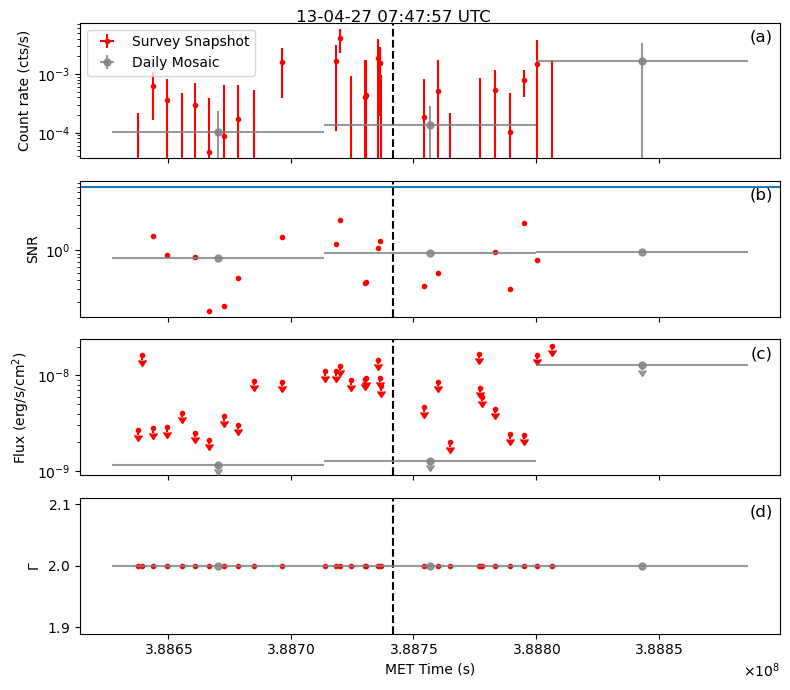

In [48]:
# source_name="GRB130427A"

# fig, axes=ba.plot_survey_lc(mosaic_list, id_list=object_name, time_unit="UTC", values=["rate","snr", "flux", "exposure"], T0=391357300.8) #T0 is GBM trigger time

# axes[1].set_yscale('log')
# axes[0].set_yscale('log')


# axes[1].axhline(5,0,1)

ba.print_parameters(mosaic_list, object_name, values=['met_time', 'utc_time', 'exposure', 'flux', 'PhoIndex'], latex_table=False, savetable=True, save_file="output_mosaic.txt")

ba.print_parameters([total_mosaic], object_name, values=['met_time', 'utc_time', 'exposure', 'flux', 'PhoIndex'], latex_table=False, savetable=True, save_file="output_mosaic_total.txt")

energy_range=None
time_unit="MET"
values=["rate","snr", "flux", "PhoIndex"]

survey_obsid_list = [f'{object_name}_survey_data', f'{object_name}_daily_mosaic_data']

obs_list_count=0
for observation_list in survey_obsid_list:

    with open(observation_list+".pkl", 'rb') as f:
        all_data=pickle.load(f)
        data=all_data[object_name]

    # get the time centers and errors
    if "mosaic" in observation_list:

        if "MET" in time_unit:
            t0 = TimeDelta(data["user_timebin/met_time"], format='sec')
            tf = TimeDelta(data["user_timebin/met_stop_time"], format='sec')
        elif "MJD" in time_unit:
            t0 = Time(data[time_str_start], format='mjd')
            tf = Time(data[time_str_end], format='mjd')
        else:
            t0 = Time(data["user_timebin/utc_time"])
            tf = Time(data["user_timebin/utc_stop_time"])
    else:
        if "MET" in time_unit:
            t0 = TimeDelta(data["met_time"], format='sec')
        elif "MJD" in time_unit:
            t0 = Time(data[time_str_start], format='mjd')
        else:
            t0 = Time(data["utc_time"])
        tf = t0 + TimeDelta(data["exposure"], format='sec')

    dt = tf - t0

    if "MET" in time_unit:
        time_center = 0.5 * (tf + t0).value
        time_diff = 0.5 * (tf - t0).value
    elif "MJD" in time_unit:
        time_diff = 0.5 * (tf - t0)
        time_center = t0 + time_diff
        time_center = time_center.value
        time_diff = time_diff.value

    else:
        time_diff = TimeDelta(0.5 * dt)  # dt.to_value('datetime')
        time_center = t0 + time_diff

        time_center = np.array([i.to_value('datetime64') for i in time_center])
        time_diff = np.array([np.timedelta64(0.5 * i.to_datetime()) for i in dt])

    x = time_center
    xerr = time_diff

    if obs_list_count == 0:
        fig, axes = plt.subplots(len(values), sharex=True, figsize=(8,7))

    axes_queue = [i for i in range(len(values))]
    # plot_value=[i for i in values]

    e_range_str = f"{14}-{195} keV"
    #axes[0].set_title(object_name + '; survey data from ' + e_range_str)

    for i in values:
        ax = axes[axes_queue[0]]
        axes_queue.pop(0)

        y = data[i]
        yerr = np.zeros(x.size)
        y_upperlim = np.zeros(x.size)

        label = i

        if "rate" in i:
            yerr = data[i + "_err"]
            label = "Count rate (cts/s)"
        elif i + "_lolim" in data.keys():
            # get the errors
            lolim = data[i + "_lolim"]
            hilim = data[i + "_hilim"]

            yerr = np.array([lolim, hilim])
            y_upperlim = data[i + "_upperlim"]

            # find where we have upper limits and set the error to 1 since the nan error value isnt
            # compatible with upperlimits
            yerr[:, y_upperlim] = 0.1 * y[y_upperlim]

        if "mosaic" in observation_list:
            if "weekly" in observation_list:
                zorder = 9
                c = "blue"
                m = "o"
                l="Weekly Mosaic"
                ms=5
                a=0.8
            if "daily" in observation_list:
                zorder = 9
                c = "gray"
                m = "o"
                l="Daily Mosaic"
                ms=5
                a=0.8
            else:
                zorder = 9
                c='green'
                m = "s"
                l = "Monthly Mosaic"
                ms=7
                a = 1
        else:
            zorder = 4
            c = "r"
            m = "o"
            l = "Survey Snapshot"
            ms=3
            a = 1

        ax.errorbar(x, y, xerr=xerr, yerr=yerr, uplims=y_upperlim, linestyle="None", marker=m, markersize=ms,
                    zorder=zorder, color=c, label=l, alpha=a)

        if ("flux" in i.lower()):
            ax.set_yscale('log')

        if ("snr" in i.lower()):
            ax.set_yscale('log')

        ax.set_ylabel(label)

    # if T0==0:
    if "MET" in time_unit:
        label_string = 'MET Time (s)'
        plt.gca().ticklabel_format(useMathText=True)
    elif "MJD" in time_unit:
        label_string = 'MJD Time (s)'
    else:
        label_string = 'UTC Time (s)'

    axes[-1].set_xlabel(label_string)

    obs_list_count += 1

axes[0].set_yscale('log')
axes[1].set_yscale('log')
axes[1].axhline(7,0,1)


#add the UTC times as well
met_values=[388741688.000]#[i.get_position()[0] for i in axes[-1].get_xticklabels()]
utc_values=[np.datetime64(sbu.met2datetime(i)) for i in met_values]

if "MET" in time_unit:
    plot_val=met_values
elif "UTC" in time_unit:
    plot_val=utc_values

for i,j in zip(plot_val, ["13-04-27 07:47:57 UTC"]):
    for ax in axes:
        ax.axvline(i, 0, 1, ls='--', color='k')
        if ax==axes[0]:
            ax.text(i, ax.get_ylim()[1]*1.03, str(j), fontsize=12, ha='center')

axes[0].legend(loc="upper left")

axes[1].set_ylabel("SNR")
axes[2].set_ylabel(r"Flux (erg/s/cm$^2$)")
axes[3].set_ylabel(r"$\Gamma$")

for ax, l in zip(axes, ["a","b","c","d"]):
    ax.text(.99, .95, f"({l})", ha='right', va='top', transform=ax.transAxes,  fontsize=12)

# #crab values for reference
# axes[-1].axhline(2.15, 0, 1)
# axes[-2].axhline(23342.70e-12, 0, 1)

fig.tight_layout()
plot_filename = object_name + '_survey_lc.pdf'
fig.savefig(plot_filename, bbox_inches="tight")

In [23]:
all_data

{'GRB130427A': {'user_timebin/met_time': array([3.886272e+08, 3.887136e+08, 3.888000e+08]),
  'user_timebin/met_stop_time': array([3.887136e+08, 3.888000e+08, 3.888864e+08]),
  'user_timebin/utc_time': array(['2013-04-25T23:59:49.516763762', '2013-04-26T23:59:49.512947900',
         '2013-04-27T23:59:49.509132039'], dtype='datetime64[ns]'),
  'user_timebin/utc_stop_time': array(['2013-04-26T23:59:49.512947900', '2013-04-27T23:59:49.509132039',
         '2013-04-28T23:59:49.505314920'], dtype='datetime64[ns]'),
  'exposure': array([ 6348., 12364.,   419.]),
  'rate': array([0.00010406, 0.00013623, 0.0016513 ]),
  'rate_err': array([0.00013382, 0.00014822, 0.00176682]),
  'snr': array([0.77761176, 0.91910604, 0.93461802]),
  'flux': array([1.17247264e-09, 1.28845444e-09, 1.27461537e-08]),
  'PhoIndex': array([2., 2., 2.]),
  'flux_lolim': array([nan, nan, nan]),
  'flux_hilim': array([nan, nan, nan]),
  'flux_upperlim': array([ True,  True,  True]),
  'PhoIndex_lolim': array([nan, nan, n

In [24]:
# import sys
# import platform

In [25]:
# #run batsurvey in parallel
# input_dict=dict(cleansnr=6,cleanexpr='ALWAYS_CLEAN==T', incatalog=f"{incat}", detthresh=9000, detthresh2=9000)
# map_dir = Path("/home/idies/workspace/Temporary/tmpataki/scratch/PATTERN_MAPS/")
# obs=ba.BatSurvey(final_obs_ids[0],recalc=True,  input_dict=input_dict, patt_noise_dir=map_dir)

In [26]:
# %debug